In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [26]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [44]:
y_train[1:]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0,

In [100]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    

In [101]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

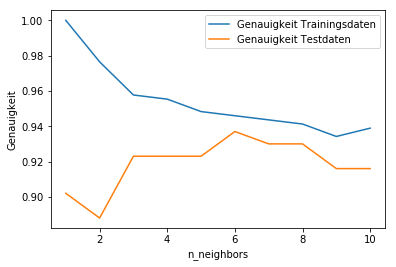

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(neighbors_settings, training_accuracy, label="Genauigkeit Trainingsdaten")
plt.plot(neighbors_settings, test_accuracy, label="Genauigkeit Testdaten")
plt.ylabel("Genauigkeit")
plt.xlabel("n_neighbors")
plt.legend()

In [112]:
from sklearn.grid_search import GridSearchCV

param_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5,verbose=100, n_jobs=-1)
grid_search.fit(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=1 ...................................................
[CV] .......................... n_neighbors=1, score=0.896552 -   0.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................... n_neighbors=1, score=0.896552 -   0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................... n_neighbors=1, score=0.862069 -   0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=1 ...................................................
[CV] .......................... n_neighbors=1, score=0.821429 -   0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=1 ............................

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy',
       verbose=100)

In [113]:
grid_search.best_score_

0.916083916083916

In [114]:
grid_search.best_params_

{'n_neighbors': 4}

In [115]:
grid_search.grid_scores_

[mean: 0.88112, std: 0.03648, params: {'n_neighbors': 1},
 mean: 0.90210, std: 0.04003, params: {'n_neighbors': 2},
 mean: 0.90210, std: 0.03351, params: {'n_neighbors': 3},
 mean: 0.91608, std: 0.02712, params: {'n_neighbors': 4},
 mean: 0.90909, std: 0.04702, params: {'n_neighbors': 5},
 mean: 0.90909, std: 0.03450, params: {'n_neighbors': 6},
 mean: 0.90909, std: 0.04702, params: {'n_neighbors': 7},
 mean: 0.91608, std: 0.04664, params: {'n_neighbors': 8},
 mean: 0.90210, std: 0.03351, params: {'n_neighbors': 9},
 mean: 0.90210, std: 0.03351, params: {'n_neighbors': 10}]

In [116]:
score_list = grid_search.grid_scores_
scores = []

for score in score_list:
    scores.append(score[1])

In [117]:
scores

[0.8811188811188811,
 0.9020979020979021,
 0.9020979020979021,
 0.916083916083916,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.916083916083916,
 0.9020979020979021,
 0.9020979020979021]

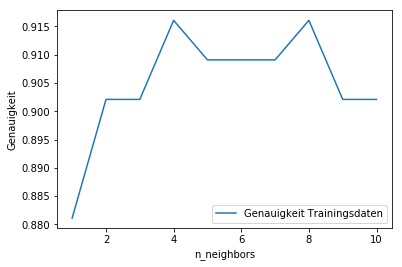

In [122]:
neighbors_settings = [1,2,3,4,5,6,7,8,9,10]
training_accuracy = []

for n_neighbors in neighbors_settings:
    training_accuracy.append(scores[(n_neighbors-1)])
    
plt.plot(neighbors_settings, training_accuracy, label="Genauigkeit Trainingsdaten")
plt.ylabel("Genauigkeit")
plt.xlabel("n_neighbors")
plt.legend()

In [119]:
grid_search.best_params_

{'n_neighbors': 4}